In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
current_date = "2024-03-06"

In [3]:
class GameStats:
    def __init__(self, name, data_set):
        self.name = name
        self.data_set = data_set[data_set["Final price"] > 0]
        self.release_date = self.data_set["DateTime"].min()
        self.age_by_day = (pd.to_datetime(current_date) - self.release_date).days
        self.data_set_pre = self.segment_by_date(self.release_date, "2020-03-01")
        self.data_set_during = self.segment_by_date("2020-03-01", "2022-03-01")
        self.data_set_post = self.segment_by_date("2022-03-01", current_date)

        self.sales_count = sum(self.data_set["Final price"].diff() < 0)
        self.sales_count_pre = sum(self.data_set_pre["Final price"].diff() < 0)
        self.sales_count_during = sum(self.data_set_during["Final price"].diff() < 0)
        self.sales_count_post = sum(self.data_set_post["Final price"].diff() < 0)

        self.highest_price = self.data_set["Final price"].max()
        self.highest_price_pre = self.data_set_pre["Final price"].max()
        self.highest_price_during = self.data_set_during["Final price"].max()
        self.highest_price_post = self.data_set_post["Final price"].max()

        self.lowest_price = self.data_set["Final price"].min()
        self.lowest_price_pre = self.data_set_pre["Final price"].min()
        self.lowest_price_during = self.data_set_during["Final price"].min()
        self.lowest_price_post = self.data_set_post["Final price"].min()

        self.average_price = self.data_set["Final price"].mean()
        self.average_price_pre = self.data_set_pre["Final price"].mean()
        self.average_price_during = self.data_set_during["Final price"].mean()
        self.average_price_post = self.data_set_post["Final price"].mean()

    def segment_by_date(self, start_date, end_date):
        return self.data_set[
            (self.data_set["DateTime"] >= pd.to_datetime(start_date))
            & (self.data_set["DateTime"] < pd.to_datetime(end_date))
        ]

In [4]:
pre_games = [
    "Hollow Knight",
    "Lobotomy Corporation",
    "Touhou Luna Nights",
    "The Messenger",
    "Katana Zero",
]

In [5]:
pre_stats = [
    GameStats(
        pre_games[i], pd.read_csv(f"1_pre_covid_19/{i+1}.csv", parse_dates=["DateTime"])
    )
    for i in range(5)
]

In [6]:
during_games = [
    "Hades",
    "Phasmophobia",
    "Record of Lodoss War-Deedlit in Wonder Labyrinth-",
    "ENDER LILIES: Quietus of the Knights",
    "Library Of Ruina",
]

In [7]:
during_stats = [
    GameStats(
        during_games[i],
        pd.read_csv(f"2_during_covid_19/{i+1}.csv", parse_dates=["DateTime"]),
    )
    for i in range(5)
]

In [8]:
post_games = [
    "Neon White",
    "Stray",
    "SIGNALIS",
    "Touhou Hero of Ice Fairy",
    "Lethal Company",
]

In [9]:
post_stats = [
    GameStats(
        post_games[i],
        pd.read_csv(f"3_post_covid_19/{i+1}.csv", parse_dates=["DateTime"]),
    )
    for i in range(5)
]

In [10]:
stages = ["", "_pre", "_during", "_post"]

In [11]:
def plot_price_dynamics(stats, stage_suffix):
    printed = False
    for stage, title_suffix in zip(
        stages,
        ["Overall", "Before Covid 19", "During Covid 19", "After Covid 19"],
    ):
        plt.figure()
        for game in stats:
            plt.plot(
                getattr(game, f"data_set{stage}")["DateTime"],
                getattr(game, f"data_set{stage}")["Final price"],
                label=game.name,
            )
            if not printed:
                print("\n===================================================")
                print(f"\nName: {game.name}")
                print(f"Release date: {game.release_date}")

                print(f"\nSales count in {game.age_by_day} days: {game.sales_count}")
                print(f"Sales count before Covid 19: {game.sales_count_pre}")
                print(f"Sales count during Covid 19: {game.sales_count_during}")
                print(f"Sales count after Covid 19: {game.sales_count_post}")

                print(f"\nHighest price: {game.highest_price}")
                print(f"Highest price before Covid 19: {game.highest_price_pre}")
                print(f"Highest price during Covid 19: {game.highest_price_during}")
                print(f"Highest price after Covid 19: {game.highest_price_post}")

                print(f"\nLowest price: {game.lowest_price}")
                print(f"Lowest price before Covid 19: {game.lowest_price_pre}")
                print(f"Lowest price during Covid 19: {game.lowest_price_during}")
                print(f"Lowest price after Covid 19: {game.lowest_price_post}")

                print(f"\nAverage price: {game.average_price}")
                print(f"Average price before Covid 19: {game.average_price_pre}")
                print(f"Average price during Covid 19: {game.average_price_during}")
                print(f"Average price after Covid 19: {game.average_price_post}")

        printed = True
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.title(
            f"Price Dynamics of Indie Games that came out {stage_suffix} - {title_suffix}"
        )
        plt.legend()
        plt.show()



Name: Hollow Knight
Release date: 2017-02-24 18:40:51

Sales count in 2566 days: 45
Sales count before Covid 19: 22
Sales count during Covid 19: 12
Sales count after Covid 19: 9

Highest price: 14.99
Highest price before Covid 19: 14.99
Highest price during Covid 19: 14.99
Highest price after Covid 19: 14.99

Lowest price: 5.99
Lowest price before Covid 19: 7.49
Lowest price during Covid 19: 7.49
Lowest price after Covid 19: 5.99

Average price: 11.744838709677419
Average price before Covid 19: 12.316666666666666
Average price during Covid 19: 11.101111111111111
Average price after Covid 19: 11.34714285714286


Name: Lobotomy Corporation
Release date: 2016-12-16 20:20:17

Sales count in 2636 days: 47
Sales count before Covid 19: 21
Sales count during Covid 19: 12
Sales count after Covid 19: 12

Highest price: 24.99
Highest price before Covid 19: 24.99
Highest price during Covid 19: 24.99
Highest price after Covid 19: 24.99

Lowest price: 8.49
Lowest price before Covid 19: 13.39
Lowes

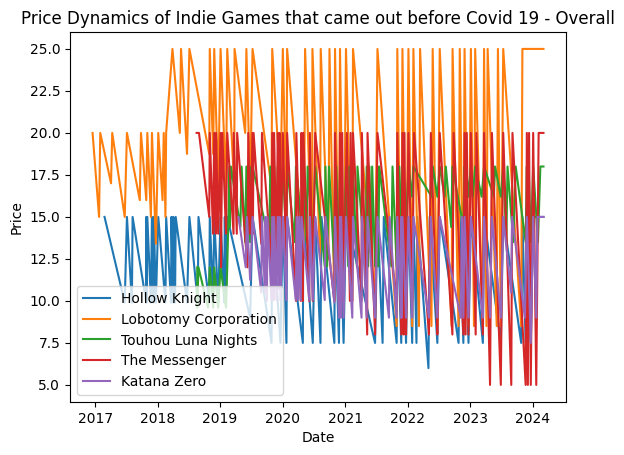

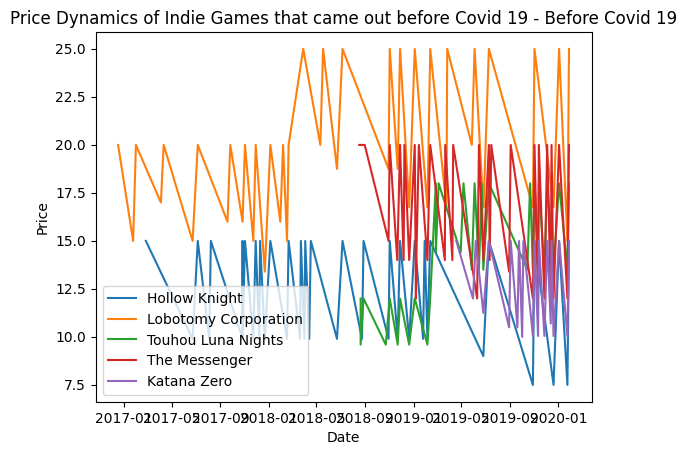

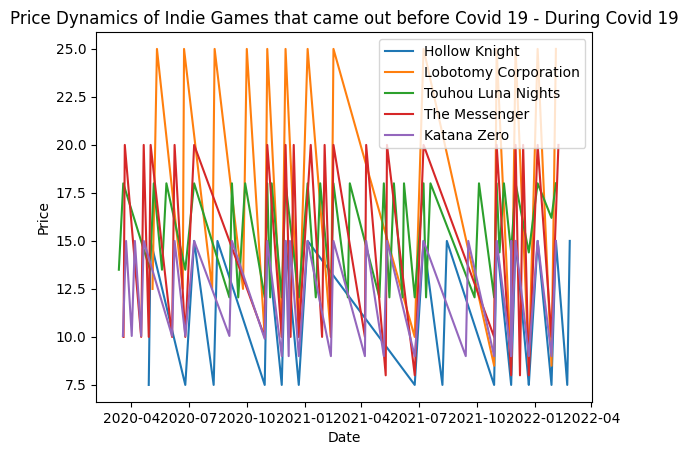

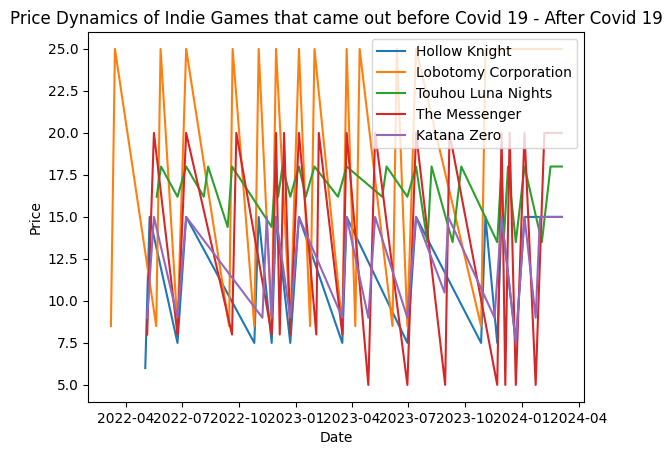



Name: Hades
Release date: 2020-09-17 14:40:08

Sales count in 1265 days: 31
Sales count before Covid 19: 0
Sales count during Covid 19: 14
Sales count after Covid 19: 17

Highest price: 24.99
Highest price before Covid 19: nan
Highest price during Covid 19: 24.99
Highest price after Covid 19: 24.99

Lowest price: 12.49
Lowest price before Covid 19: nan
Lowest price during Covid 19: 16.24
Lowest price after Covid 19: 12.49

Average price: 20.40666666666667
Average price before Covid 19: nan
Average price during Covid 19: 21.67103448275862
Average price after Covid 19: 19.415675675675676


Name: Phasmophobia
Release date: 2020-09-18 18:00:04

Sales count in 1264 days: 23
Sales count before Covid 19: 0
Sales count during Covid 19: 11
Sales count after Covid 19: 11

Highest price: 13.99
Highest price before Covid 19: nan
Highest price during Covid 19: 13.99
Highest price after Covid 19: 13.99

Lowest price: 11.19
Lowest price before Covid 19: nan
Lowest price during Covid 19: 11.89
Lowes

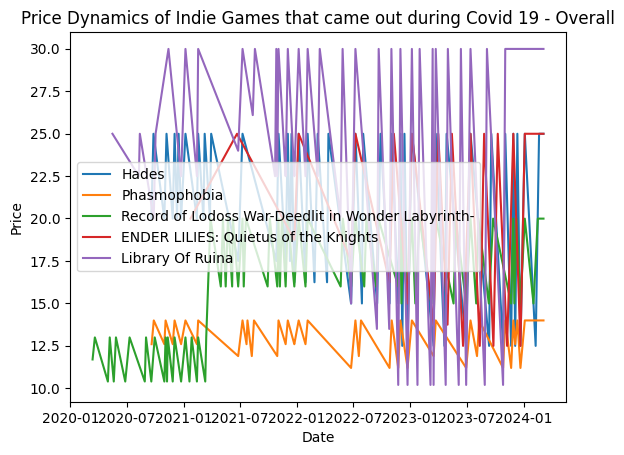

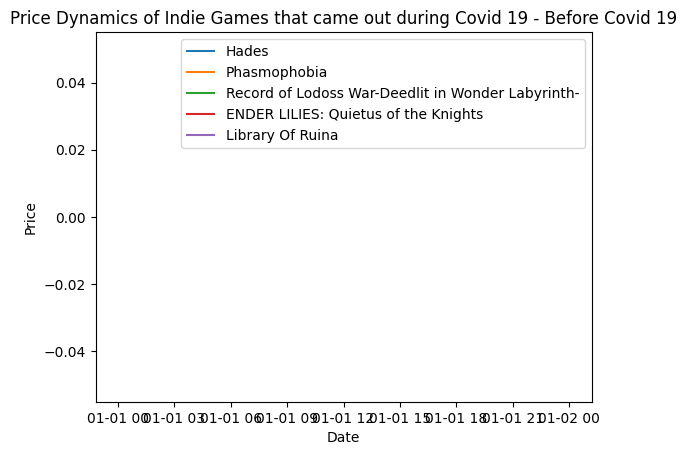

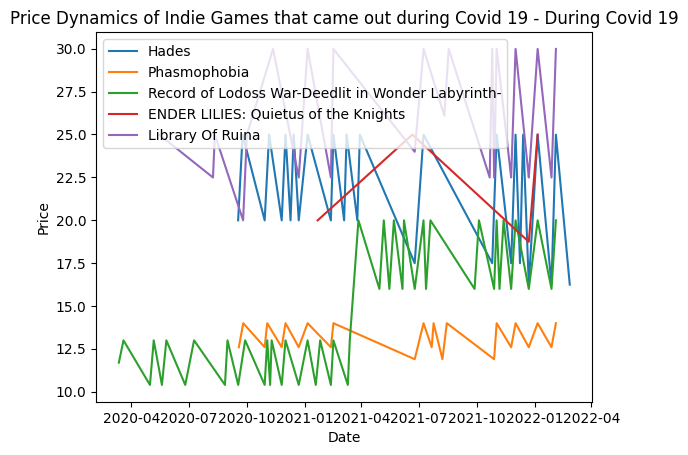

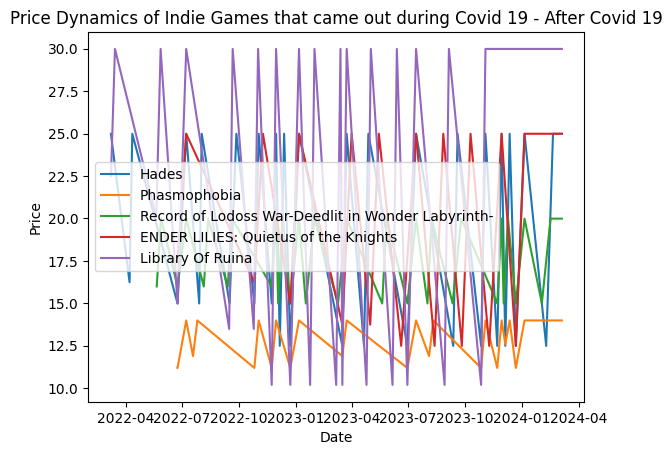



Name: Neon White
Release date: 2022-05-26 17:20:04

Sales count in 649 days: 14
Sales count before Covid 19: 0
Sales count during Covid 19: 0
Sales count after Covid 19: 14

Highest price: 24.99
Highest price before Covid 19: nan
Highest price during Covid 19: nan
Highest price after Covid 19: 24.99

Lowest price: 14.99
Lowest price before Covid 19: nan
Lowest price during Covid 19: nan
Lowest price after Covid 19: 14.99

Average price: 21.844838709677422
Average price before Covid 19: nan
Average price during Covid 19: nan
Average price after Covid 19: 21.844838709677422


Name: Stray
Release date: 2022-06-02 22:30:01

Sales count in 642 days: 15
Sales count before Covid 19: 0
Sales count during Covid 19: 0
Sales count after Covid 19: 15

Highest price: 29.99
Highest price before Covid 19: nan
Highest price during Covid 19: nan
Highest price after Covid 19: 29.99

Lowest price: 19.79
Lowest price before Covid 19: nan
Lowest price during Covid 19: nan
Lowest price after Covid 19: 19.

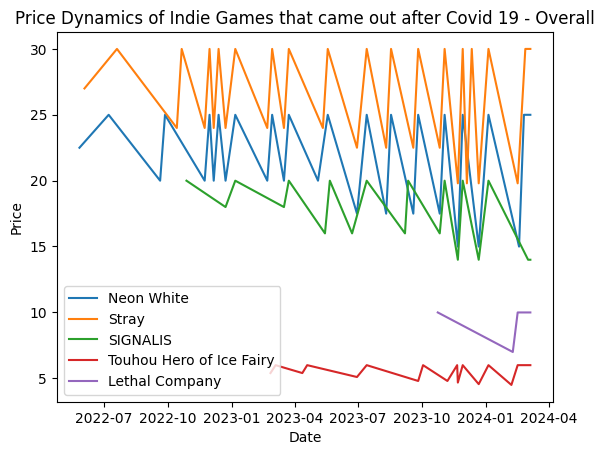

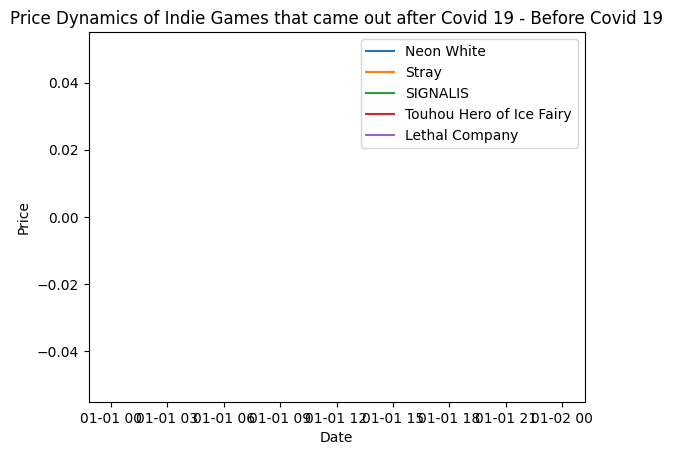

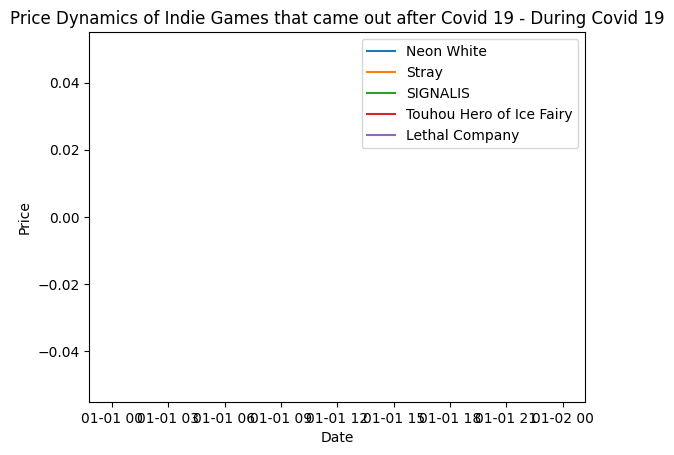

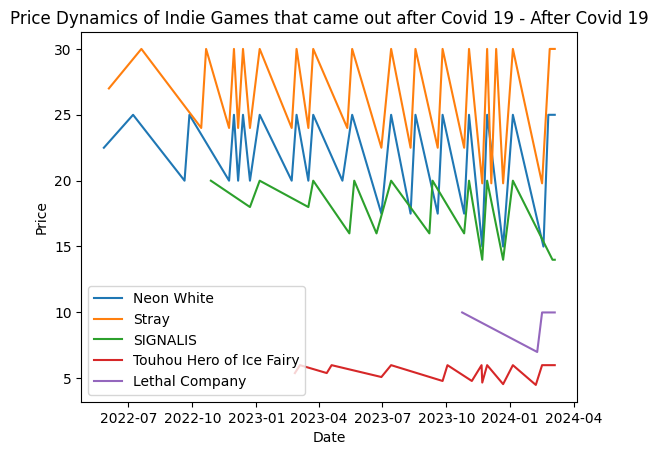

In [12]:
plot_price_dynamics(pre_stats, "before Covid 19")
plot_price_dynamics(during_stats, "during Covid 19")
plot_price_dynamics(post_stats, "after Covid 19")